Number of clusters: 1
Cluster centers: [[-0.22329227 -0.17058265  0.0420861 ]]


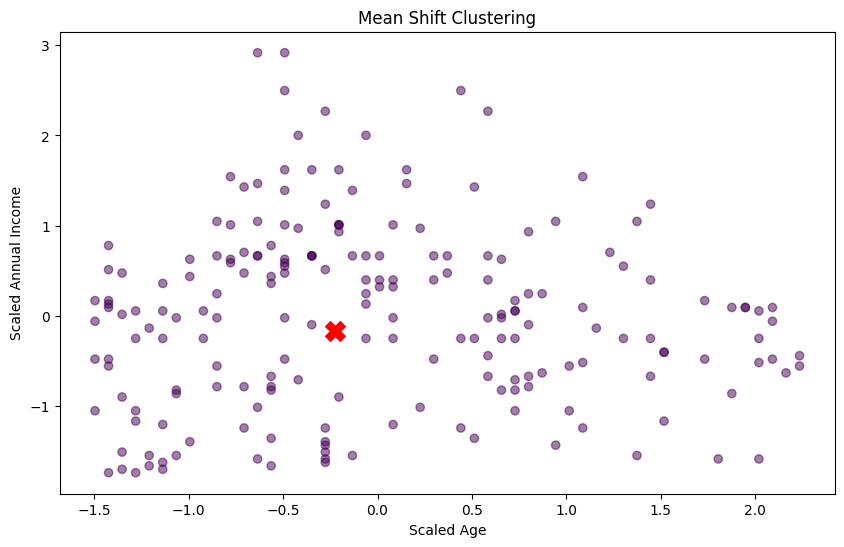

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

# Step 1: Load data
data = pd.read_csv('..\\dataset\\mall_customers.csv')

# Step 2: Feature selection
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Data preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Estimate bandwidth (bandwidth influences the number of clusters)
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

# Step 5: Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Step 6: Number of clusters and cluster centers
n_clusters_ = len(np.unique(labels))
print("Number of clusters:", n_clusters_)
print("Cluster centers:", cluster_centers)

# Step 7: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X')
plt.title('Mean Shift Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.show()
